<a href="https://colab.research.google.com/github/nurdankar/Diffusion_Equation/blob/main/Diffusion_Equation_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of 2D Diffusion Equation

In [13]:
"Import libraries"
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm               #to use colormap
from mpl_toolkits.mplot3d import Axes3D #for 3D plotting

In this section, we will work on a two-dimensional diffusion equation

$$
\frac{\partial u}{\partial t} = D \nabla u.
$$

That is,

$$
\frac{\partial u}{\partial t} = D\left(\frac{\partial^2 u}{\partial x}+\frac{\partial^2 u}{\partial y}\right).
$$

The discretized version of the two-dimensional diffusion equation can be written as


$$
\frac{u_{i, j}^{n+1}-u_{i, j}^n}{\Delta t}=D \bigg[ \frac{u_{i+1, j}^n-2 u_{i, j}^n+u_{i-1, j}^n}{\Delta x^2} + \frac{u_{i, j+1}^n-2 u_{i, j}^n+u_{i, j-1}^n}{\Delta y^2}\bigg]. \quad  ...(1)$$

After a bit of manipulation, we can write the equation (1) in

$$
u_{i, j}^{n+1} = u_{i, j}^n + \frac{D \Delta t}{\Delta x^2} \Big[ u_{i+1, j}^n-2 u_{i, j}^n+u_{i-1, j}^n \Big] + \frac{D \Delta t}{\Delta y^2} \Big[ u_{i, j+1}^n-2 u_{i, j}^n+u_{i, j-1}^n\Big] \quad ...(2)
$$

form, which we will code it in a nested for loop.

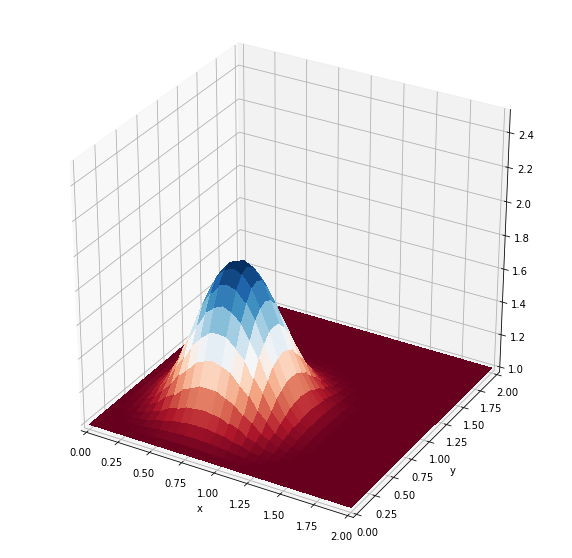

In [14]:
D = .05       #diffusion coefficient
Nx = 31       #nodes for x-axis
Ny = 31       #nodes for y-axis
Lx = 2        #the length of variable x
Ly = 2        #the length of variable x
Nt = 14       #time step
u_t, u_l, u_b, u_r = 1, 1, 1, 1    #boundaries: u_top, u_left, u_bottom, u_right
dx = 2 / (Nx - 1)                  #the length of each subintervals for x
dy = 2 / (Ny - 1)                  #the length of each subintervals for y
sigma = .25                        #Courant number - it provides stability and depends on the discretization                                      
dt = sigma * dx * dy / D           #delta t                                     
x = np.linspace(0, Lx, Nx)         #the start and stop points of the x-vector to plot
y = np.linspace(0, Ly, Ny)         #the start and stop points of the y-vector to plot
u = np.ones((Nx, Ny))              #starting diffusivity
un = np.ones((Nx, Ny))             #a placeholder array 

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 #initial condition: u=2 in the interval 0.5 ≤ x ≤1 and u = 1 everywhere else in (0,2) 
                                                                 #(i.e., a hat function)
u[0, :] = u_t             #top boundary
u[-1,:] = u_l             #left boundary
u[:, 0] = u_b             #bottom boundary
u[:,-1] = u_r             #right boundary

for k in range(1, Nt):        #iterate through time
  un = u.copy()               #copy the existing values of u into un
  for i in range(1, Nx-1):    #iterate through x-axis  
    for j in range(1, Ny-1):  #iterate through y-axis 
      u[i, j] = un[i][j] + (D * dt / dx ** 2) * (un[i+1][j] - 2 * un[i][j]         #see equation (2)
                + un[i-1][j]) + (D * dt / dx ** 2) * (un[i][j+1] - 2 * un[i][j] + un[i][j-1])


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)      #make coordinate arrays
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)

ax.set_xlim(0, Lx)  #Set the x-axis view limits - Lx = 2
ax.set_ylim(0, Ly)  #Set the y-axis view limits - Ly = 2
ax.set_zlim(1, 2.5) #Set the z-axis view limits

ax.set_xlabel('x')  #name the x-axis
ax.set_ylabel('y')  #name the y-axis
plt.show()

##Implementation with Python functions

Let us see if we can get the same graph as above.

In [15]:
class Diffusion2D():  
  
  def __init__(self, D = .05, Nx = 31, Ny = 31, Lx = 2, Ly = 2, u_t = 1, u_l = 1, u_b = 1, u_r = 1, dx = 2/30, dy = 2/30, Nt = 14, sigma = .25):  
    self.D = D                                                                                  
    self.Nx = Nx
    self.Ny = Ny 
    self.Lx = Lx
    self.Ly = Ly
    self.dx = 2 / (self.Nx - 1)
    self.dy = 2 / (self.Ny - 1)
    self.sigma = sigma                                                                        
    self.dt = self.sigma * self.dx * self.dy / self.D                                                      
    self.Nt = Nt
    self.u_t = u_t       
    self.u_l = u_l      
    self.u_b = u_b       
    self.u_r = u_r       
    self.x = np.linspace(0, self.Lx, self.Nx)
    self.y = np.linspace(0, self.Ly, self.Ny)
    self.u = np.ones((self.Ny, self.Nx))
    self.un = np.ones((self.Ny, self.Nx))  
    
  

  def initialise(self):                         
    self.u[int(.5 / self.dy):int(1 / self.dy + 1),int(.5 / self.dx):int(1 / self.dx + 1)] = 2


  def boundary(self):
    self.u[0, :] = self.u_l
    self.u[-1,:] = self.u_r
    self.u[:, 0] = self.u_b
    self.u[:,-1] = self.u_t
 


  def solve(self, D, Nt, Nx, Ny, Lx, Ly):
    for k in range(1, self.Nt):
      self.un = self.u.copy()
      for i in range(1, self.Nx-1):
        for j in range(1, self.Ny-1):
          self.u[i, j] = self.un[i][j] + (self.D * self.dt / self.dx ** 2) * (self.un[i+1][j] - 2 * self.un[i][j] 
                          + self.un[i-1][j]) + (self.D * self.dt / self.dx ** 2) * (self.un[i][j+1] - 2 * self.un[i][j] + self.un[i][j-1])   
    return self.u


  def plot(self):
    u = self.u
    x = np.linspace(0, self.Lx, self.Nx)
    y = np.linspace(0, self.Ly, self.Ny)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

    ax.set_xlim(0, self.Lx)
    ax.set_ylim(0, self.Ly)
    ax.set_zlim(1, 2.5)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()


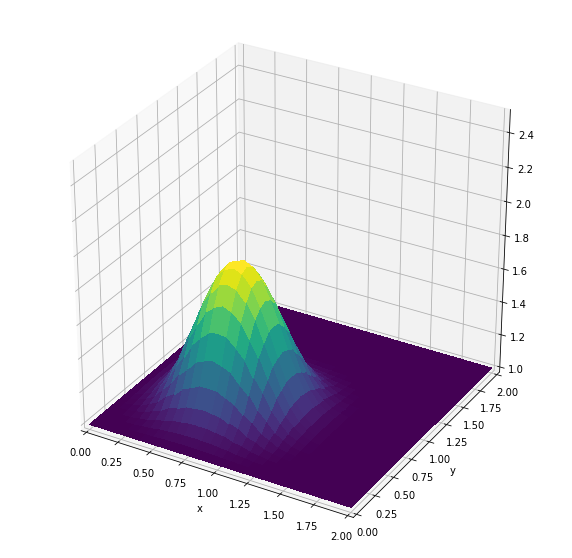

In [16]:
"Getting outputs"
dSolver = Diffusion2D() 
D, Nt, Nx, Ny, Lx, Ly = .05, 14, 31, 31, 2, 2


dSolver.initialise()   
dSolver.boundary()     
dSolver.solve(D, Nt, Nx, Ny, Lx, Ly)       
dSolver.plot() 